<a href="https://colab.research.google.com/github/Lerity12/my-project/blob/main/E-commerce%20Overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Короткий зміст**

- **Що аналізували:** географію (континенти/країни), категорії, канали/джерела та девайси, динаміку продажів, поведінку зареєстрованих/підписників.
- **Ключові драйвери:** США,  органічний пошук (SEO), десктопи дають найбільшу виручку; топ-категорії - дивани, крісла, ліжка.
- **Динаміка:** виражена тижнева й сезонна циклічність.
- **Зони зростання:** соцмережі добре конвертують  - потрібно додати бюджет/контент; персоналізувати офери для США, Індії, Канади; запустити A/B-тест чекауту на desktop та iOS.
- **Якість даних:** багато трафіку як “Undefined” і прогалини по девайсах - потрібно виправити UTM-мітки та налаштувати трекінг, щоб коректно бачити канали й пристрої.

In [ ]:
!pip install --upgrade google-cloud-bigquery

from google.colab import auth
from google.cloud import bigquery
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


auth.authenticate_user()

client = bigquery.Client(project="data-analytics-mate")

query = """
SELECT
s.date as order_date,
s.ga_session_id as session_id,
sp.continent  as continent,
sp.country as country,
sp.device as device,
sp.browser as browser,
sp.mobile_model_name as device_model_name,
sp.operating_system as operating_system,
sp.language as browser_language,
sp.name as traffic_source,
sp.channel as traffic_channel,
acs.account_id as user_id,
(acc.is_verified = 1) as email_confirmed,
(acc.is_unsubscribed = 0) as newsletter_subscribed,
p.category as product_category,
p.name as product_name,
p.price as price,
p.short_description as product_short_description

FROM
  `data-analytics-mate.DA.session` as s
LEFT JOIN `data-analytics-mate.DA.session_params` as sp
ON sp.ga_session_id = s.ga_session_id
LEFT JOIN `data-analytics-mate.DA.account_session` as acs
ON acs.ga_session_id = s.ga_session_id
LEFT JOIN `data-analytics-mate.DA.account` as acc
ON acc.id = acs.account_id
LEFT JOIN `data-analytics-mate.DA.order` as o
ON o.ga_session_id = s.ga_session_id
LEFT JOIN `data-analytics-mate.DA.product` as p
ON p.item_id = o.item_id

"""

query_job = client.query(query)
results = query_job.result()

df = results.to_dataframe()

df.head()

,order_date,session_id,continent,country,device,browser,device_model_name,operating_system,browser_language,traffic_source,traffic_channel,user_id,email_confirmed,newsletter_subscribed,product_category,product_name,price,product_short_description
0,2020-11-01,5760483956,Americas,United States,desktop,Chrome,Safari,Macintosh,zh,<Other>,Paid Search,<NA>,<NA>,<NA>,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"
1,2020-11-01,7115337200,Europe,United Kingdom,desktop,Chrome,Chrome,Web,en-us,(organic),Organic Search,<NA>,<NA>,<NA>,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"
2,2020-11-01,3978035233,Europe,Norway,mobile,Chrome,<Other>,Web,zh,(direct),Direct,<NA>,<NA>,<NA>,Tables & desks,RÅSKOG,189.0,"Trolley, 35x45x78 cm"
3,2020-11-01,9648986282,Africa,Nigeria,mobile,Chrome,<Other>,Android,es-es,(direct),Direct,<NA>,<NA>,<NA>,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"
4,2020-11-01,4393441533,Asia,China,desktop,Chrome,Chrome,Windows,en-us,(direct),Direct,<NA>,<NA>,<NA>,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"


###**Опис датасету**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349545 entries, 0 to 349544
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   order_date                 349545 non-null  dbdate 
 1   session_id                 349545 non-null  Int64  
 2   continent                  349545 non-null  object 
 3   country                    349545 non-null  object 
 4   device                     349545 non-null  object 
 5   browser                    349545 non-null  object 
 6   device_model_name          349545 non-null  object 
 7   operating_system           349545 non-null  object 
 8   browser_language           235279 non-null  object 
 9   traffic_source             349545 non-null  object 
 10  traffic_channel            349545 non-null  object 
 11  user_id                    27945 non-null   Int64  
 12  email_confirmed            27945 non-null   boolean
 13  newsletter_subscribed      27

* **Загальна кількість колонок: 18**

* **Кількість колонок числового типу: 3 (session_id, user_id, price)**

* **Кількість колонок категоріального типу: 12 (continent, device, browser, device_model_name, operating_system, browser_language, traffic_source, traffic_channel, product_category, product_name, product_short_description)**

* **Кількість колонок типу boolean: 2 (email_confirmed, newsletter_subscribed)**

* **Кількість колонок типу datetime: 1 (order_date)**

In [ ]:
df.describe()

,session_id,user_id,price
count,349545.0,27945.0,33538.000000
mean,4992250296.631739,659005.065557,953.298679
std,2887450949.537772,13216.529465,1317.001775
min,1205.0,636133.0,3.000000
25%,2493646855.0,647576.0,170.000000
50%,4988476074.0,658952.0,445.000000
75%,7491286508.0,670414.0,1195.000000
max,9999997129.0,681962.0,9585.000000


* **Кількість унікальних сесій**

In [ ]:
print(f"Кількість унікальних сесій: {df['session_id'].nunique()}")

Кількість унікальних сесій: 349545


* **Який період часу розглядається**

In [ ]:
print(f'Період: від {df["order_date"].min()} до {df["order_date"].max()}')

Період: від 2020-11-01 до 2021-01-31


* **Пропущені значення**

In [ ]:
na_values = df.isna().any().any()
columns_with_na = df.isna().any()

print(f"Пропущені значення у датасеті: {na_values}")
print(f"Стовпці: {columns_with_na}")

Пропущені значення у датасеті: True
Стовпці: order_date                   False
session_id                   False
continent                    False
country                      False
device                       False
browser                      False
device_model_name            False
operating_system             False
browser_language              True
traffic_source               False
traffic_channel              False
user_id                       True
email_confirmed               True
newsletter_subscribed         True
product_category              True
product_name                  True
price                         True
product_short_description     True
dtype: bool


* **В яких колонках більше пропущених значень, яка причина?**

In [ ]:
na = df.isna().sum().sort_values(ascending=False)
na_pct = (na/len(df)*100).round(2)
summary = pd.concat([na[na>0], na_pct[na>0]], axis=1)
summary.columns = ["nulls", "null_%"]
print(summary.head(10))

                            nulls  null_%
newsletter_subscribed      321600   92.01
email_confirmed            321600   92.01
user_id                    321600   92.01
product_short_description  316007   90.41
product_name               316007   90.41
product_category           316007   90.41
price                      316007   90.41
browser_language           114266   32.69


**NaN у більшості випадків є наслідоком LEFT JOIN: сесії без покупків/аккаунтів, тому поля про інформацію товарів і аккаунтів залишаються порожніми. Також через обмеження трекінгу не завжди збираються технічні параметри такі як мова браузера.**

* **Кількість рядків**

In [ ]:
print("Рядків:", len(df))

Рядків: 349545


* **Розподіл сесій за континентом**

In [ ]:
df.drop_duplicates("session_id")["continent"].value_counts().head()

,count
continent,
Americas,193179
Asia,83113
Europe,65135
Oceania,3703
Africa,3620


* **Розподіл сесій за країною**

In [ ]:
df.drop_duplicates("session_id")["country"].value_counts().head(10)

,count
country,
United States,153470
India,32763
Canada,25994
United Kingdom,11003
France,6958
Spain,6505
Germany,6196
China,6066
Taiwan,5879


* **Кількість унікальних моделей і їх назвви**

In [ ]:
print(f"Унікальних моделей: {df['device_model_name'].nunique()}")

print(f"Назви унікальних моделей: {df['device_model_name'].unique()}")

Унікальних моделей: 10
Назви унікальних моделей: ['Safari' 'Chrome' '<Other>' 'iPhone' 'Pixel 3' 'ChromeBook' 'iPad'
 'Pixel 4 XL' 'Edge' 'Firefox']


* **Частка рядків із покупкою**

In [ ]:
print(f"Частка рядків із покупкою, %: {(df["price"].notna().mean()*100).round(2)}")

Частка рядків із покупкою, %: 9.59


* **Кількість дублікатів**

In [ ]:
print(f"Кількість дублікатів рядків: {df.duplicated().sum()}")

Кількість дублікатів рядків: 0


###**Бізнес-аналіз**

* **ТОП-3 континенти за прибутком**

ТОП-3 континента за прибутком:
continent
Americas    17665280.0
Asia         7601298.3
Europe       5934624.2
Name: price, dtype: float64


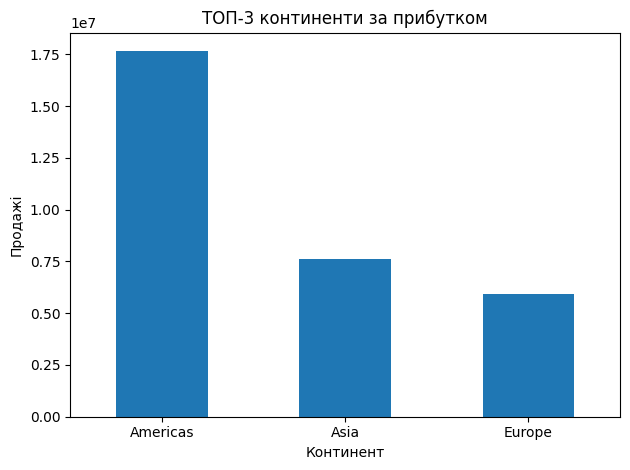

In [ ]:
top3_continent  = (df.groupby("continent")["price"].sum().sort_values(ascending=False).head(3))

print("ТОП-3 континента за прибутком:")
print(top3_continent)

#візуалізація
plt.figure()
top3_continent.plot(kind="bar")
plt.title("ТОП-3 континенти за прибутком")
plt.ylabel("Продажі")
plt.xlabel("Континент")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


* **ТОП-5 країн за прибутком**

ТОП-5 країн за прибутком:
country
United States     13943553.9
India              2809762.0
Canada             2437921.0
United Kingdom      938317.9
France              710692.8
Name: price, dtype: float64


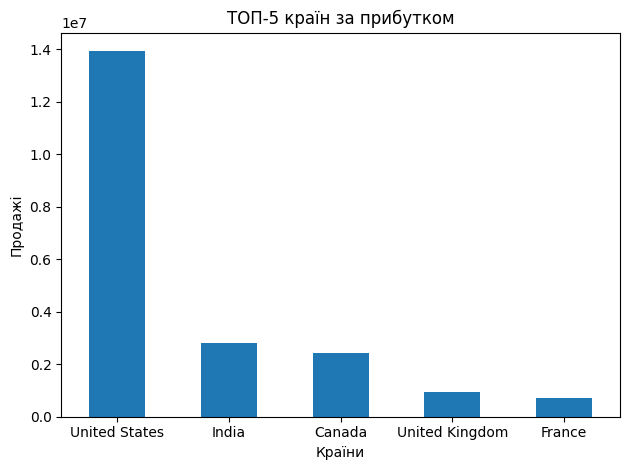

In [ ]:
top5_countries  = (df.groupby("country")["price"].sum().sort_values(ascending=False).head(5))

print("ТОП-5 країн за прибутком:")
print(top5_countries)

#візуалізація
plt.figure()
top5_countries.plot(kind="bar")
plt.title("ТОП-5 країн за прибутком")
plt.ylabel("Продажі")
plt.xlabel("Країни")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

* **Найбільша кількість замовлень**

In [ ]:
#розраухнок к-сті замовлень по континентам
session_by_continent = (df.groupby(["session_id", "continent"])["price"].sum(min_count=1).reset_index())
orders_by_continent = (session_by_continent.query("price > 0").groupby("continent")["session_id"].nunique().sort_values(ascending=False))

#розраухнок к-сті замовлень по країнам
session_by_countries = (df.groupby(["session_id", "country"])["price"].sum(min_count=1).reset_index())
orders_by_countries = (session_by_countries.query("price > 0").groupby("country")["session_id"].nunique().sort_values(ascending=False))


print("Топ континенти за кількістю замовлень:")
print(orders_by_continent.head(3), "\n")

print("Топ країни за кількістю замовлень:")
print(orders_by_countries.head(3))

Топ континенти за кількістю замовлень:
continent
Americas    18553
Asia         7950
Europe       6261
Name: session_id, dtype: int64 

Топ країни за кількістю замовлень:
country
United States    14673
India             3029
Canada            2560
Name: session_id, dtype: int64


* **Висновки по континтам і країнам в розрізі прибутку і замовлень**

1. Лідер - **Америка**, регіон значно виперджає Європу та Азію.

2. Країна - **США**.

Можемо побачити сильну залежність від **США**, що добре для фокусу, але варто **підсилювати масштабування** у Індії та Канаді (Індія друге місце, Канада третє)

* **ТОП 10 категорій за прибутком**

In [ ]:
top10_categories = (df.groupby("product_category")["price"].sum().sort_values(ascending=False).head(10))

print("Топ 10 категорій за прибутком:")
print(top10_categories)

Топ 10 категорій за прибутком:
product_category
Sofas & armchairs                   8388254.5
Chairs                              6147748.8
Beds                                4919725.0
Bookcases & shelving units          3640818.1
Cabinets & cupboards                2336499.5
Outdoor furniture                   2142222.2
Tables & desks                      1790307.5
Chests of drawers & drawer units     906562.5
Bar furniture                        735503.0
Children's furniture                 467697.0
Name: price, dtype: float64


* **ТОП 10 категорій у країні-лідері**

In [ ]:
country_leader = (df.dropna(subset=["country"]).groupby("country")["price"].sum().idxmax())

top10_categories_in_leader = (df[df["country"].eq(country_leader)].groupby("product_category")["price"].sum().nlargest(10))

print(f"Країна-лідер: {country_leader}", "\n")
print(top10_categories_in_leader)

Країна-лідер: United States 

product_category
Sofas & armchairs                   3707144.5
Chairs                              2619773.8
Beds                                2213058.0
Bookcases & shelving units          1567606.9
Cabinets & cupboards                 994545.5
Outdoor furniture                    929245.2
Tables & desks                       777865.0
Chests of drawers & drawer units     382388.0
Bar furniture                        330805.0
Children's furniture                 207575.0
Name: price, dtype: float64


* **Висновки ТОП 10 категорій**

1. Лідери категорій однакові глобально і в **США**. Трійка лідерів та ж сама: Sofas & armchairs, Chairs, Beds
2. США дають значну частку прибутку в кожній топ категорій (приблизно **40-45%** від глобальної виручки). Будь-який ріст у США помітно рухатиме глобальні показники.
3. Фокус на **Sofas & armchairs, Chairs, Beds**.
4. **Сезонні/нішеві** категорії нижчі в рейтингу. Outdoor furniture, Bar furniture, Children’s furniture їх варто підримувати таргетовано (сезон, конкретні ринки).

Фокус в **США** на топових категоріях - посилити маркетингові кампанії.


* **Продажі за типами/моделями девайсів, % від загальних**

In [ ]:
total_revenue = df["price"].sum()

device_revenue = (df.groupby("device")["price"].sum().sort_values(ascending=False) / total_revenue * 100)

device_model_revenue = (df.groupby(["device", "device_model_name"])["price"].sum().sort_values(ascending=False) / total_revenue * 100)

print("Продажі за типом девайсів, %:")
print(device_revenue.dropna().head(), "\n")
print("Продажі за моделями девайсів (топ 10), %:")
print(device_model_revenue.dropna().head(10), "\n")

Продажі за типом девайсів, %:
device
desktop    59.002245
mobile     38.734924
tablet      2.262831
Name: price, dtype: float64 

Продажі за моделями девайсів (топ 10), %:
device   device_model_name
desktop  Chrome               27.835602
         Safari               20.300643
mobile   iPhone               20.082667
         <Other>              17.937951
desktop  ChromeBook            5.725241
         Edge                  2.179667
         <Other>               1.644093
tablet   iPad                  1.403910
desktop  Firefox               1.316998
tablet   <Other>               0.858922
Name: price, dtype: float64 



* **Продажі за каналами трафіку**

Продажі за каналом трафіку, %:
traffic_channel
Organic Search    35.760189
Paid Search       26.620546
Direct            23.442345
Social Search      7.919827
Undefined          6.257093
Name: price, dtype: float64 



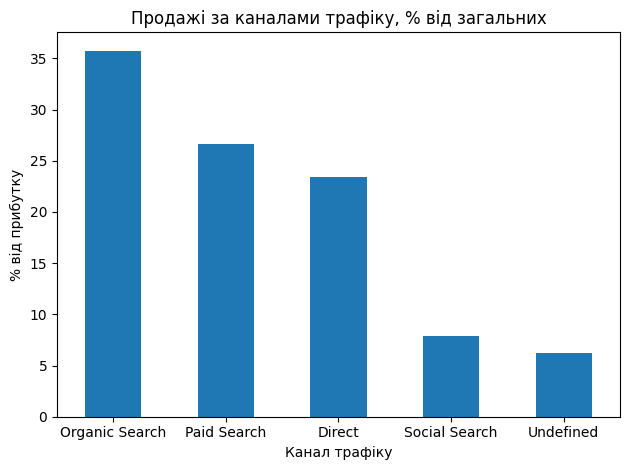

In [ ]:
traffic_revenue = (df.groupby("traffic_channel")["price"].sum()
                        .sort_values(ascending=False) / total_revenue * 100)

print("Продажі за каналом трафіку, %:")
print(traffic_revenue.dropna().head(), "\n")


plt.figure()
traffic_revenue.head(10).plot(kind="bar")
plt.title("Продажі за каналами трафіку, % від загальних")
plt.ylabel("% від прибутку")
plt.xlabel("Канал трафіку")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

* **Зареєстровані користувачі, що підтвердили email %**

In [ ]:
users = (df[df["user_id"].notna()][["user_id", "email_confirmed", "newsletter_subscribed"]].drop_duplicates("user_id"))

confirmed = (users["email_confirmed"] == True).mean() * 100

print(f"Зареєстровані користувачі, що підтвердили email, %: {confirmed:.2f}")

Зареєстровані користувачі, що підтвердили email, %: 71.70


* **Зареєстровані користувачі, що відписались %**

In [ ]:
unsubscribed = ((users["newsletter_subscribed"] == False).mean() * 100)

print(f"Зареєстровані користувачі, що відписались, %: {unsubscribed:.2f}")

Зареєстровані користувачі, що відписались, %: 16.94


* **ТОП 10 країн за кількістю зареєстрованих користувачів**

In [ ]:
top_countries_users = (df[df["user_id"].notna()].drop_duplicates(["user_id", "country"]).groupby("country")["user_id"].nunique().sort_values(ascending=False).head(10))

print(f"ТОП 10 країн за кількістю зареєстрованих користувачів: {top_countries_users}")

ТОП 10 країн за кількістю зареєстрованих користувачів: country
United States     12384
India              2687
Canada             2067
United Kingdom      859
France              553
Spain               536
Taiwan              500
China               490
Germany             490
Italy               386
Name: user_id, dtype: int64


* **Висновки:**

1. Пристрої: лідирує **Desktop**, далі Mobile. Tablet має мінімальний внесок.
2. Канали: на першому місці **Organic Search**, далі йде Paid Search.
3. Email/підписки: Більшість підтверджують мейли, але % непідтверджених значний (**більше 20%**)
4. Країни: **США** на першому місці, далі йде Індія та Канада.

Потрібно спростити **email-confirm**, щоб знизити відсоток непідтверджених мейлів.

###**Аналіз динаміки продажів**

* **Загальна динаміка продажів**

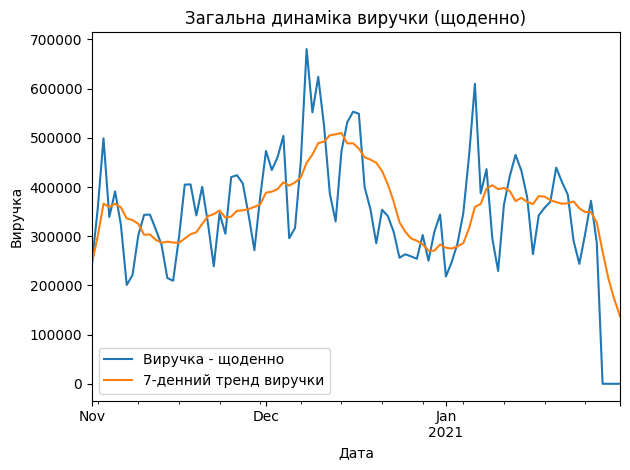

In [ ]:
df["order_date"] = pd.to_datetime(df["order_date"])
df["price"] = pd.to_numeric(df["price"])


daily = df.resample("D", on="order_date")["price"].sum(min_count=1).fillna(0)
daily_trend_7d = daily.rolling(7, min_periods=1).mean()

#print(daily_7)

plt.figure()
daily.plot(label="Виручка - щоденно")
daily_trend_7d.plot(label= "7-денний тренд виручки")
plt.title("Загальна динаміка виручки (щоденно)")
plt.xlabel("Дата"); plt.ylabel("Виручка"); plt.legend()
plt.tight_layout(); plt.show()

* **Загальна динаміка замовлень**

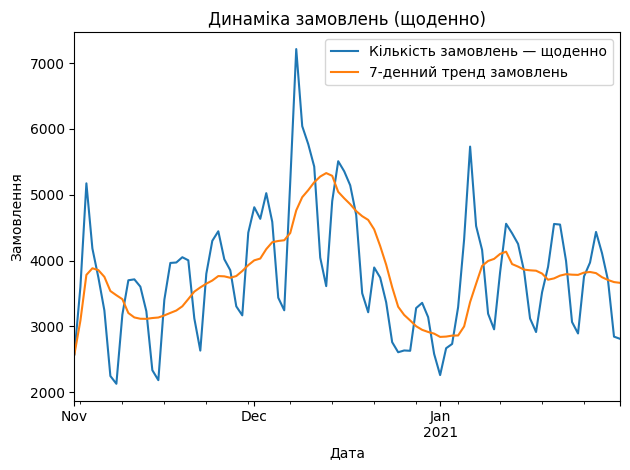

In [ ]:
orders_daily = df.resample("D", on="order_date")["session_id"].nunique()
orders_trend_7d = orders_daily.rolling(7, min_periods=1).mean()

plt.figure()
orders_daily.plot(label="Кількість замовлень — щоденно")
orders_trend_7d.plot(label="7-денний тренд замовлень")
plt.title("Динаміка замовлень (щоденно)")
plt.xlabel("Дата"); plt.ylabel("Замовлення")
plt.legend(); plt.tight_layout(); plt.show()

* **Висновки:**



1. І виручка, і кількість замовлень зростають до **початку/середини грудня**, потім плавно спадають у **січні**.
2. Видна чітка тижнева сезонність: вищі значення у **будні** та нижчі на вихідних.



* **Динаміка продажу за континетами (щотижня)**

<Figure size 640x480 with 0 Axes>

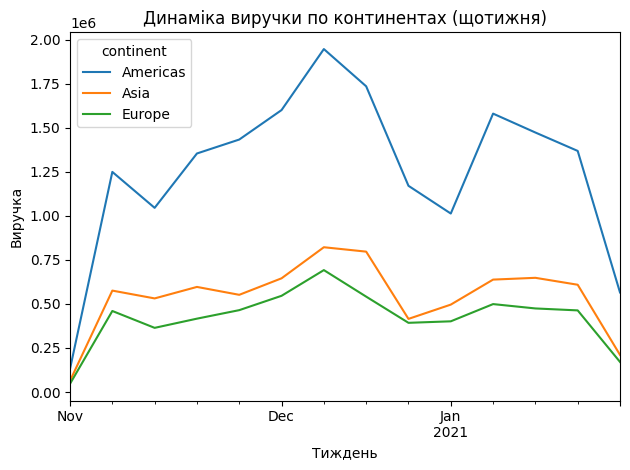

In [ ]:
weekly_cont = (df.groupby([pd.Grouper(key="order_date", freq="W"), "continent"])["price"].sum().unstack("continent").fillna(0))

plot_df = weekly_cont.loc[:, weekly_cont.columns.intersection(["Americas", "Asia", "Europe"])]
if plot_df.empty:
    plot_df = weekly_cont

plt.figure()
plot_df.plot()
plt.title("Динаміка виручки по континентах (щотижня)")
plt.xlabel("Тиждень")
plt.ylabel("Виручка")
plt.tight_layout()
plt.show()

* **Динаміка по каналах трафіку (щотижня)**

<Figure size 640x480 with 0 Axes>

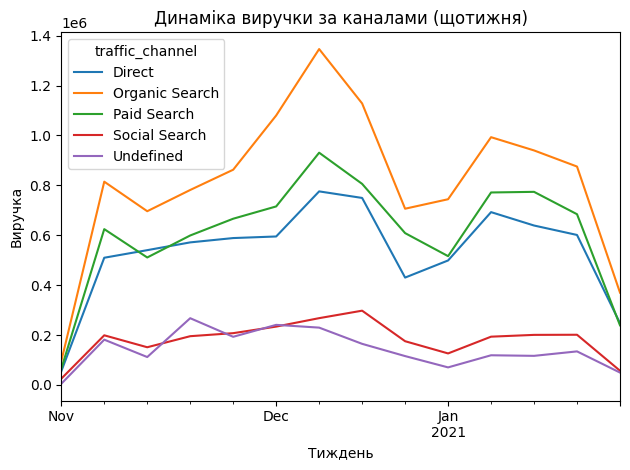

In [ ]:
weekly_channel = (df.groupby(["traffic_channel", pd.Grouper(key="order_date", freq="W")])["price"].sum().unstack(0).fillna(0))


plt.figure()
weekly_channel.plot()
plt.title("Динаміка виручки за каналами (щотижня)")
plt.xlabel("Тиждень")
plt.ylabel("Виручка")
plt.tight_layout()
plt.show()

* **Динаміка по типах девайсів (щотижня)**

<Figure size 640x480 with 0 Axes>

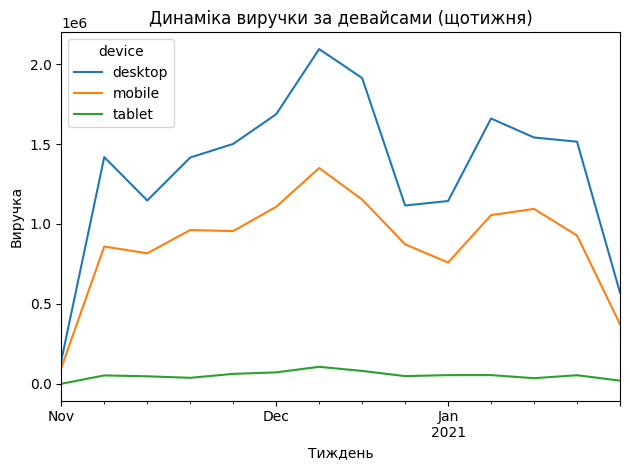

In [ ]:
weekly_channel = (df.groupby(["device", pd.Grouper(key="order_date", freq="W")])["price"].sum().unstack(0).fillna(0))


plt.figure()
weekly_channel.plot()
plt.title("Динаміка виручки за девайсами (щотижня)")
plt.xlabel("Тиждень")
plt.ylabel("Виручка")
plt.tight_layout()
plt.show()

* **Висновки:**
1. За континентами: Найбільшу виручку приносить **Америка**, а Європа та Азія - схожі та нижчі.
2. За пристроями: **Desktop** є основним джерелом виручки. Mobile також важливий, планшет приносить найменше виручки
3. За каналами: **Organic Search** є найефективнішим каналом


###**Зведені таблиці**

* **Кількість сесій у розрізі каналів трафіку**

In [ ]:
mask = (
    df["session_id"].notna()
    & df["traffic_channel"].notna()
    & df["device"].notna()
    & (df["traffic_channel"] != "Undefined")
)

base = df.loc[mask, ["session_id", "traffic_channel", "device"]].drop_duplicates()

pivot_sessions = pd.crosstab(
    index=base["traffic_channel"],
    columns=base["device"]
)

print("Кількість сесій у розрізі каналів трафіку:" "\n")
print(pivot_sessions)

Кількість сесій у розрізі каналів трафіку:

device           desktop  mobile  tablet
traffic_channel                         
Direct             47825   31745    1812
Organic Search     72622   49014    2789
Paid Search        55167   37034    2140
Social Search      16288   10988     638


* **Загальні продажі за категоріями товарів (топ-10 категорій) у різних країнах (топ-5 країн)**

In [ ]:
top_countries = df.groupby("country")["price"].sum().nlargest(5).index
top_categories = df.groupby("product_category")["price"].sum().nlargest(10).index

filt = df["country"].isin(top_countries) & df["product_category"].isin(top_categories)

pivot_sales = pd.pivot_table(
    df.loc[filt],
    index="product_category",
    columns="country",
    values="price",
    aggfunc="sum",
    fill_value=0
)

pivot_sales = pivot_sales.assign(_total=pivot_sales.sum(axis=1)).sort_values("_total", ascending=False).drop(columns="_total")


print("Загальні продажі топ-10 категорій у топ-5 країнaх" "\n")
print(pivot_sales)

Загальні продажі топ-10 категорій у топ-5 країнaх

country                             Canada    France     India  \
product_category                                                 
Sofas & armchairs                 692427.5  187735.0  788430.0   
Chairs                            417740.8  134029.4  544309.2   
Beds                              354772.0  116414.0  358319.5   
Bookcases & shelving units        278981.9   73830.0  364507.4   
Cabinets & cupboards              181802.0   59101.5  191888.0   
Outdoor furniture                 185322.8   40486.4  162289.4   
Tables & desks                    132678.0   42299.0  186157.5   
Chests of drawers & drawer units   71952.0   21544.5   73111.0   
Bar furniture                      51724.0   11199.0   57657.0   
Children's furniture               30264.0   14258.0   39177.0   

country                           United Kingdom  United States  
product_category                                                 
Sofas & armchairs       

* **Кількість сесій за континентами у розрізі типів девайсів**

In [ ]:
mask_2 = df["session_id"].notna() & df["continent"].notna() & df["device"].notna()

sess_cont_device = (
    df.loc[mask_2, ["session_id", "continent", "device"]]
      .drop_duplicates()
)

pivot_cont_device = pd.crosstab(
    index=sess_cont_device["continent"],
    columns=sess_cont_device["device"]
)

print("Кількість сесій за континентами у розрізі типів девайсів" "\n")
print(pivot_cont_device)

Кількість сесій за континентами у розрізі типів девайсів

device     desktop  mobile  tablet
continent                         
(not set)      497     284      14
Africa        2131    1422      67
Americas    113016   75889    4274
Asia         48442   32755    1916
Europe       38132   25517    1486
Oceania       2211    1400      92


* **Висновки:**

1. Продажі за країнами та категоріями: **Сполучені Штати** є лідерами за продажами меблів, особливо диванів і крісел, які є найприбутковішою категорією.

2. Сесії за континентами та пристроями: Більшість сесій на всіх континентах відбувається з **десктопних пристроїв**, що робить їх основним джерелом трафіку. Загалом, тут також лідирує **Америка**.

3. Сесії за каналами та пристроями: **Paid Search** та **Organic Search** генерують найбільшу кількість сесій як на десктопах, так і на мобільних пристроях, що підтверджує їхню ефективність.

4. Найвища виручка зазвичай припадає на **ранок (9:00)** і **обід (12:00)**. Це може свідчити про активність користувачів у робочі години.

###**Статистичний аналіз взаємозв’язків**

* **Сесії vs виручка (щоденно): кореляція та значущість**

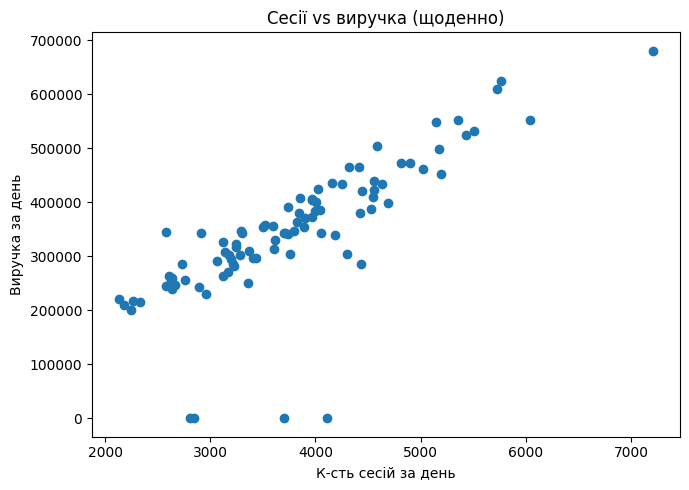

Pearson r: 0.79 p_value: 6.483532312080735e-21
Spearman rho: 0.87 p_value: 9.755923586156614e-29
Висновок (Пірсон): Кореляція є статистично значущою.
Висновок (Спірмен): Кореляція є статистично значущою.


In [ ]:
import seaborn as sns
from scipy.stats import pearsonr, spearmanr


df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")
df["price"] = pd.to_numeric(df["price"], errors="coerce")

daily = (df.groupby("order_date").agg(sessions=("session_id", "nunique"),
                revenue=("price", "sum")).dropna())


plt.figure(figsize=(7, 5))
plt.scatter(daily["sessions"], daily["revenue"])
plt.title("Сесії vs виручка (щоденно)")
plt.xlabel("К-сть сесій за день")
plt.ylabel("Виручка за день")
plt.tight_layout()
plt.show()


r_p, p_value_pearson = pearsonr(daily["sessions"], daily["revenue"])
r_s, p_value_spearman = spearmanr(daily["sessions"], daily["revenue"])

print("Pearson r:", round(r_p, 2), "p_value:", p_value_pearson)
print("Spearman rho:", round(r_s, 2), "p_value:", p_value_spearman)

if p_value_pearson < 0.05:
    print("Висновок (Пірсон): Кореляція є статистично значущою.")
else:
    print("Висновок (Пірсон): Кореляція не є статистично значущою.")

if p_value_spearman < 0.05:
    print("Висновок (Спірмен): Кореляція є статистично значущою.")
else:
    print("Висновок (Спірмен): Кореляція не є статистично значущою.")

* **Висновок:**

Більше сесій - зазвичай більша виручка. Зв’язок статистично значущий за обома критеріями.

* **Чи корелюють продажі між континентами? (топ-3)**

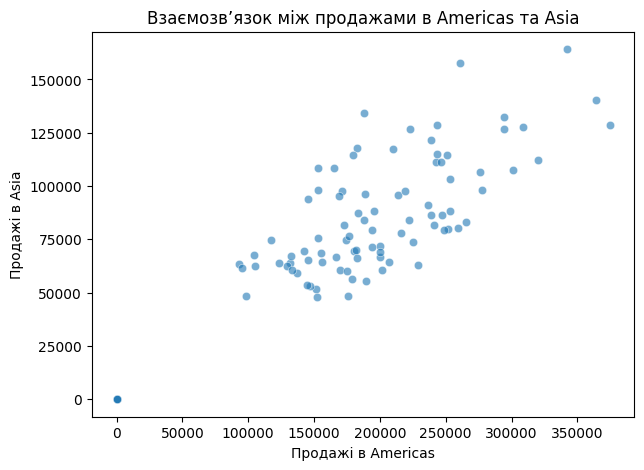

Коефіцієнт кореляції між продажами в Americas та Asia: 0.79
P-значення: 0.0000
Висновок: Кореляція є статистично значущою.


In [ ]:
top_continents = df.groupby("continent")["price"].sum().nlargest(3).index

sales_continent_1 = df[df["continent"] == top_continents[0]].groupby("order_date")["price"].sum().reset_index()
sales_continent_2 = df[df["continent"] == top_continents[1]].groupby("order_date")["price"].sum().reset_index()

sales_comparison = pd.merge(sales_continent_1, sales_continent_2, on="order_date", suffixes=('_c1', '_c2'))


plt.figure(figsize=(7, 5))
sns.scatterplot(x="price_c1", y="price_c2", data=sales_comparison, alpha=0.6)
plt.title(f"Взаємозв’язок між продажами в {top_continents[0]} та {top_continents[1]}")
plt.xlabel(f"Продажі в {top_continents[0]}")
plt.ylabel(f"Продажі в {top_continents[1]}")
plt.show()


corr_c, p_val_c = pearsonr(sales_comparison["price_c1"], sales_comparison["price_c2"])

print(f"Коефіцієнт кореляції між продажами в {top_continents[0]} та {top_continents[1]}: {corr_c:.2f}")
print(f"P-значення: {p_val_c:.4f}")

if p_val_c < 0.05:
    print("Висновок: Кореляція є статистично значущою.")
else:
    print("Висновок: Кореляція не є статистично значущою.")

* **Висновки:**

**Між продажами в Америці та Азії існує сильна та статистично значуща кореляція.** Це свідчить про схожість динаміки продажів на цих континентах.

* **Чи корелюють продажі між каналами трафіку?**

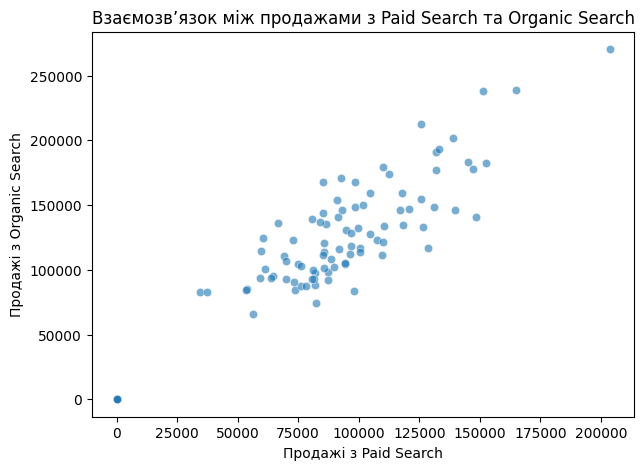

Коефіцієнт кореляції між Paid Search та Organic Search: 0.87
P-значення: 0.0000
Висновок: Кореляція є статистично значущою.


In [ ]:
sales_channel_1 = df[df["traffic_channel"] == "Paid Search"].groupby("order_date")["price"].sum().reset_index()
sales_channel_2 = df[df["traffic_channel"] == "Organic Search"].groupby("order_date")["price"].sum().reset_index()

sales_channel_comparison = pd.merge(sales_channel_1, sales_channel_2, on="order_date", suffixes=("_ch1", "_ch2"))


plt.figure(figsize=(7, 5))
sns.scatterplot(x="price_ch1", y="price_ch2", data=sales_channel_comparison, alpha=0.6)
plt.title("Взаємозв’язок між продажами з Paid Search та Organic Search")
plt.xlabel("Продажі з Paid Search")
plt.ylabel("Продажі з Organic Search")
plt.show()


corr_ch, p_val_ch = pearsonr(sales_channel_comparison["price_ch1"], sales_channel_comparison["price_ch2"])

print(f"Коефіцієнт кореляції між Paid Search та Organic Search: {corr_ch:.2f}")
print(f"P-значення: {p_val_ch:.4f}")

if p_val_ch < 0.05:
    print("Висновок: Кореляція є статистично значущою.")
else:
    print("Висновок: Кореляція не є статистично значущою.")

* **Висновок:**

**Між продажами з Paid Search та Organic Search існує сильна та статистично значуща кореляція**. Це вказує на те, що ці канали тісно взаємопов'язані і зростають або падають одночасно.

* **Чи падає конверсія у дні з високим трафіком?**

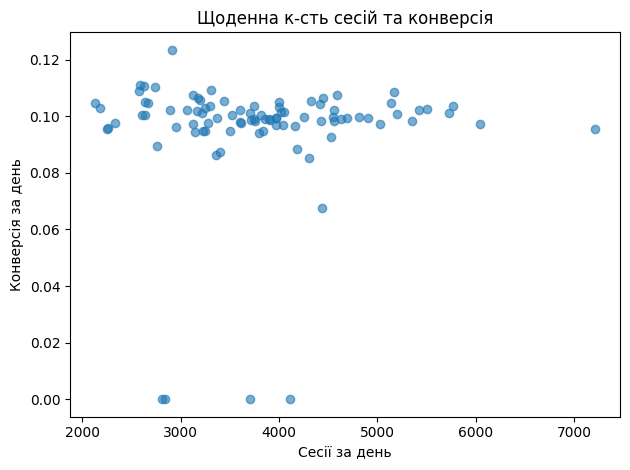

Spearman ρ=-0.09, p=0.4074
Висновок: значущого зв’язку не виявлено


In [ ]:
df = df.copy()
df["order_date"] = pd.to_datetime(df["order_date"])
df["price"] = pd.to_numeric(df["price"])


sessions = (df.groupby("session_id", as_index=False).agg(order_date=("order_date","min"),
                   revenue=("price","sum")))


daily_sessions = sessions.groupby("order_date")["session_id"].nunique()
daily_conv = (sessions.assign(purchased=sessions["revenue"] > 0).groupby("order_date")["purchased"].mean())


plt.figure()
plt.scatter(daily_sessions, daily_conv, alpha=0.6)
plt.title("Щоденна к-сть сесій та конверсія")
plt.xlabel("Сесії за день")
plt.ylabel("Конверсія за день")
plt.tight_layout(); plt.show()


rho, p = spearmanr(daily_sessions, daily_conv)
print(f"Spearman ρ={rho:.2f}, p={p:.4f}")
print("Висновок:",
      "значущий зв’язок" if p < 0.05 else "значущого зв’язку не виявлено")

* **Висновки:**

Ми бачимо, що **значущого зв’язку не виявлено** - це означає, що зростання трафіку не гарантує підвищення конверсіїю

###**Статистичний аналіз відмінностей між групами**

* **Зареєстровані vs незареєстровані**

In [ ]:
from scipy.stats import mannwhitneyu


df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")
df["price"] = pd.to_numeric(df["price"], errors="coerce")
df["is_registered"] = df["user_id"].notna()


daily_revenue = df.groupby(["order_date", "is_registered"])["price"].sum().unstack(fill_value=0)

registered_daily = daily_revenue[True]
anonymous_daily = daily_revenue[False]

u_stat, p_value = mannwhitneyu(registered_daily, anonymous_daily, alternative="two-sided")

print(f"Mann–Whitney U: u_stat={u_stat}, p_value={p_value}")
print("Висновок:", "різниця значуща" if p_value < 0.05 else "різниця незначуща")

Mann–Whitney U: u_stat=360.0, p_value=8.379540669190225e-27
Висновок: різниця значуща


* **AOV (середній чек) у двох каналах**

In [ ]:
session_data = df.groupby("session_id").agg(revenue=("price", "sum"),
                                            device=("device", "first")).dropna()


aov_desktop = session_data.loc[session_data["device"] == "desktop", "revenue"]
aov_mobile = session_data.loc[session_data["device"] == "mobile", "revenue"]


u_stat, p_value = mannwhitneyu(aov_desktop, aov_mobile, alternative="two-sided")

print(f"AOV Desktop vs Mobile (Mann–Whitney): U={u_stat}, p={p_value}")


if p_value < 0.05:
    print("Висновок: AOV відрізняється.")
else:
    print("Висновок: істотної різниці AOV не виявлено.")

AOV Desktop vs Mobile (Mann–Whitney): U=14043741195.5, p=0.3659793287079123
Висновок: істотної різниці AOV не виявлено.


* **Висновки:**

1. Виручка зареєстрованих користувачів значно вища, ніж у анонімних.
2. Істотної різниці в середньому чеку між користувачами десктопів та мобільних пристроїв не виявлено.

##**Опис отриманих результатів і висновки з погляду бізнес-логіки**

**Ключові драйвери бізнесу:** **Сполучені Штати**, **органічний пошук (SEO)** **та десктопні пристрої** є головними джерелами виручки. Найбільш прибуткові категорії товарів — це дивани, крісла та ліжка.

**Точки зростання:** Соціальні мережі мають високий коефіцієнт конверсії і великий потенціал для зростання. Існує чітка тижнева та сезонна динаміка продажів.

**Проблемні зони:** Невизначені джерела трафіку ("Undefined") та проблеми з даними про пристрої ускладнюють аналіз.

**Рекомендації**

**Масштабування:** Зосередження маркетингових зусилль на США, SEO та десктопах. Забезпечення наявності і конкурентності ціни на товари з топ-категорій.

**Оптимізація:** Використати персоналізовані пропозиції для клієнтів у США, Індії та Канаді. Провести A/B тестування сторінки оформлення замовлення на десктопах та iOS.

**Виправлення даних:** Налаштувати UTM-мітки та трекінг, щоб виключити "Undefined" трафік.

###**[Посилання](https://public.tableau.com/shared/WCH3Y4SX5?:display_count=n&:origin=viz_share_link) на дашборд в Tableau**